In [23]:
import pandas as pd

# column = 'race'
# group1 = 'white'
# group2 = 'black'

# column = 'gender'
# group1 = 'male'
# group2 = 'female'

column = 'age'
group1 = 'child'
group2 = 'adult'

# column = 'edulevel'
# group1 = 'low'
# group2 = 'high'

file_path = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.csv'

df = pd.read_csv(file_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_gr1 = df[df['ptid_group'] == group1]
df_gr2 = df[df['ptid_group'] == group2]
df
df_gr1

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
1,102,80,102,child,3.138799,3.778059,2.634110,2.573555
3,93,20,93,child,3.186636,2.896262,2.710756,2.653104
7,186,40,186,child,2.921250,2.923309,2.497801,2.453779
10,15,60,15,child,3.276611,4.426612,2.678079,2.618132
13,56,40,56,child,3.683774,3.674435,2.775108,2.761707
...,...,...,...,...,...,...,...,...
2244,15,80,15,child,3.276611,3.091056,2.695213,2.634409
2246,229,100,229,child,2.414043,2.406622,2.018983,1.994675
2247,4,70,4,child,4.339833,3.869084,3.623502,3.509725
2249,103,0,103,child,3.137283,3.591341,2.975058,2.847637


In [24]:
df_gr2

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,27,0,27,adult,1.530347,3.854136,1.289434,1.287654
2,33,70,33,adult,1.764359,1.690459,1.600777,1.584263
4,143,20,143,adult,2.538419,2.522637,2.190819,2.182866
5,70,50,70,adult,1.355174,1.266281,1.117623,1.100718
6,9,10,9,adult,2.474025,3.017326,2.016529,2.000201
...,...,...,...,...,...,...,...,...
2248,137,100,137,adult,2.467114,2.317479,1.864357,1.866109
2250,217,60,217,adult,3.280882,2.917560,2.580173,2.573791
2251,168,50,168,adult,1.464972,1.931271,1.069707,1.071095
2253,92,100,92,adult,1.498251,1.825728,1.400736,1.389065


In [25]:
def calculate_mean_and_95CI(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]

    # Initialize a list to store each row of the final DataFrame
    rows_list = []
    stats_dict = {}

    # Calculate the statistics for each RMSE column
    for col in rmse_columns:
        col_data = df[col].dropna()  # Exclude NaN values for the calculation
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        # Confidence interval calculation
        ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
        ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
        
        # Store the statistics in the dictionary
        stats_dict[f'{col}_mean'] = mean
        # stats_dict[f'{col}_median'] = median
        # stats_dict[f'{col}_std'] = std
        stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
        stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

    # Append the stats for the current ratio to the rows_list
    rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_results1 = calculate_mean_and_95CI(df_gr1)
df_results2 = calculate_mean_and_95CI(df_gr2)
df_results = calculate_mean_and_95CI(df)
# df_results1.T
df_results2.T

,0
rmse_naive_mean,2.196621
rmse_naive_95p_CI_Lower,2.167542
rmse_naive_95p_CI_Upper,2.225701
rmse_single_mean,2.345052
rmse_single_95p_CI_Lower,2.306137
rmse_single_95p_CI_Upper,2.383967
rmse_base_mean,1.846940
rmse_base_95p_CI_Lower,1.822714
rmse_base_95p_CI_Upper,1.871166
rmse_tl_mean,1.822862


In [26]:
file_path_gender = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_gender.csv'
file_path_age = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_age.csv'
file_path_race = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_race.csv'

df_gender = pd.read_csv(file_path_gender)
df_age = pd.read_csv(file_path_age)
df_race = pd.read_csv(file_path_race)

df_gender.drop('Unnamed: 0', axis=1, inplace=True)
df_age.drop('Unnamed: 0', axis=1, inplace=True)
df_race.drop('Unnamed: 0', axis=1, inplace=True)

df_combined = pd.concat([df_race, df_gender, df_age ], axis=0)
df_results = calculate_mean_and_95CI(df_combined)

df_gr1_race = df_race[df_race['ptid_group']=='white']
df_gr2_race = df_race[df_race['ptid_group']=='black']

df_gr1_gender = df_gender[df_gender['ptid_group']=='male']
df_gr2_gender = df_gender[df_gender['ptid_group']=='female']

df_gr1_age = df_age[df_age['ptid_group']=='child']
df_gr2_age = df_age[df_age['ptid_group']=='adult']


df_results_gr1_race = calculate_mean_and_95CI(df_gr1_race)
df_results_gr2_race = calculate_mean_and_95CI(df_gr2_race)

df_results_gr1_gender = calculate_mean_and_95CI(df_gr1_gender)
df_results_gr2_gender = calculate_mean_and_95CI(df_gr2_gender)

df_results_gr1_age = calculate_mean_and_95CI(df_gr1_age)
df_results_gr2_age = calculate_mean_and_95CI(df_gr2_age)


In [27]:
df_race.columns


Index(['PtID', 'ratio', 'ptid_test', 'ptid_group', 'rmse_naive', 'rmse_single',
       'rmse_base', 'rmse_tl'],
      dtype='object')

In [28]:
import seaborn as sns

def calc_stats_results(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]
    # Initialize a list to store each row of the final DataFrame
    rows_list = []

    # Loop over each ratio_w value
    for ratio in df['ratio'].unique():
        # Filter the DataFrame for the current ratio
        df_ratio = df[df['ratio'] == ratio]
        
        # Initialize a dictionary to store the stats for the current ratio
        stats_dict = {'ratio': ratio}
        
        # Calculate the statistics for each RMSE column
        for col in rmse_columns:
            col_data = df_ratio[col].dropna()  # Exclude NaN values for the calculation
            mean = col_data.mean()
            median = col_data.median()
            std = col_data.std()
            # Confidence interval calculation
            ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
            ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
            
            # Store the statistics in the dictionary
            stats_dict[f'{col}_mean'] = mean
            # stats_dict[f'{col}_median'] = median
            # stats_dict[f'{col}_std'] = std
            stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
            stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

        # Append the stats for the current ratio to the rows_list
        rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_stats_gr1 = calc_stats_results(df_gr1)
df_stats_gr2 = calc_stats_results(df_gr2)
df_stats_all = calc_stats_results(df_combined)

In [30]:
# file_path_save = f'../results/processed_data/3_1_calculated_ressults/3_2_rmse_summary_per_ratio_{column}.csv'
# df_stats_gr1.to_csv(file_path_save)

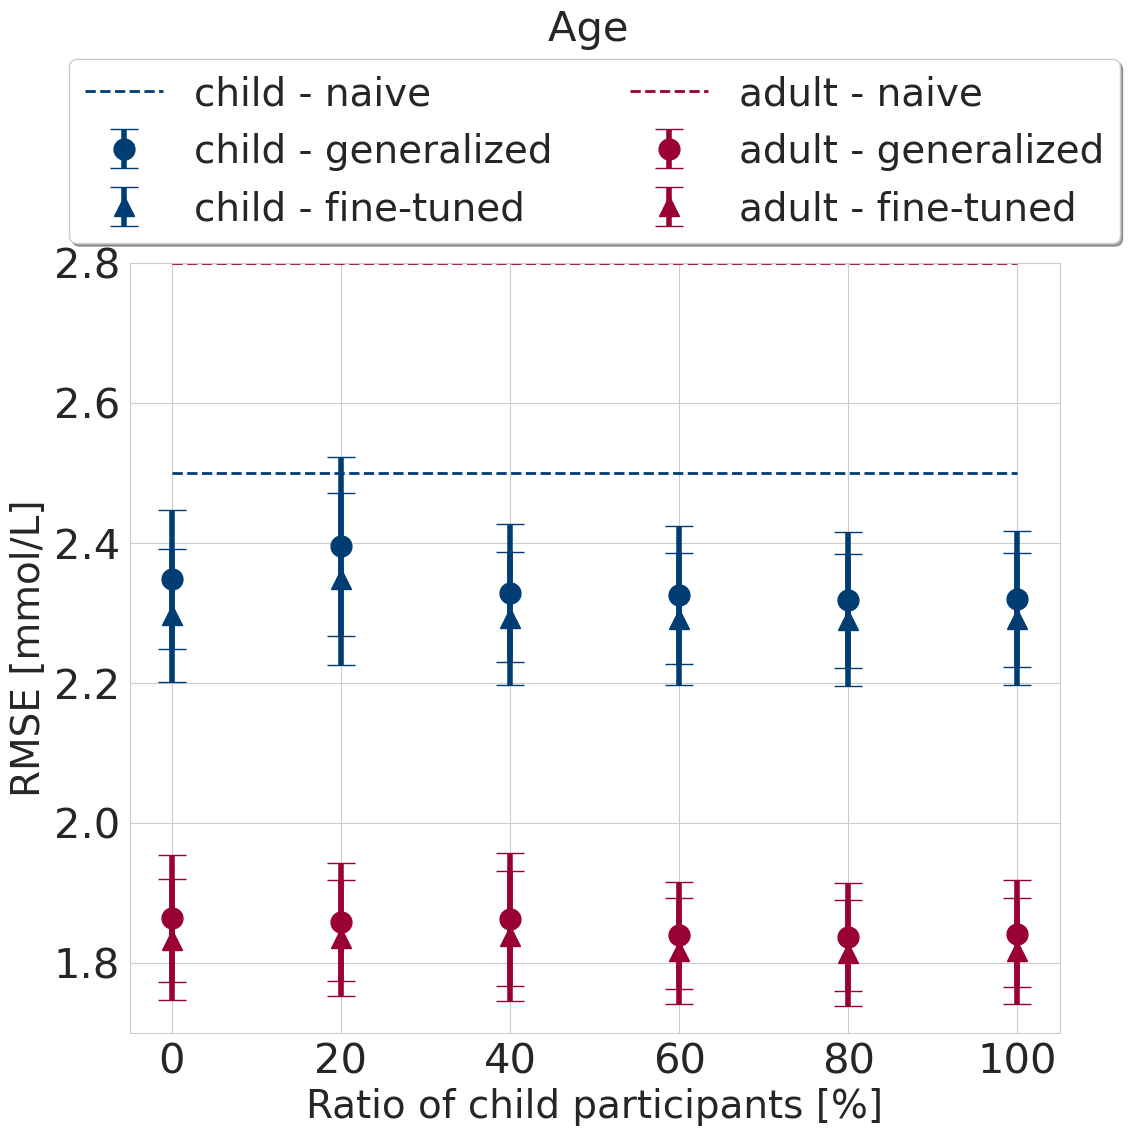

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

file_name_with_extension = file_path.split("/")[-1]
file_name = file_name_with_extension.split(".")[0]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
# df_gr1_filtered =df_gr1.copy()
# df_gr2_filtered =df_gr1.copy()

df_gr1_filtered=df_gr1[df_gr1['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_gr2_filtered =df_gr2[df_gr2['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_stats_gr1 = df_stats_gr1[df_stats_gr1['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_stats_gr2 = df_stats_gr2[df_stats_gr2['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()


rmse_col_gr1 = df_gr1_filtered['rmse_base']
rmse_col_gr2 = df_gr2_filtered['rmse_base']

rmse_col_tl_gr1 = df_gr1_filtered['rmse_tl']
rmse_col_tl_gr2 = df_gr2_filtered['rmse_tl']


gr1_color = "#003d73"
gr2_color = "#990033"
# gr1_color = "#D79B00"
# gr2_color = "#9673A6"
# gr3_color = "#21918c"
alpha_value = 0.5  # saturation
marker1 = "o"
marker2 = "^"
marker3 = "x"

y_group1 = df_stats_gr1['rmse_base_mean']
y_group2 = df_stats_gr2['rmse_base_mean']
y_group1_CI95_l = df_stats_gr1['rmse_base_95p_CI_Lower']
y_group1_CI95_u = df_stats_gr1['rmse_base_95p_CI_Upper']
y_group2_CI95_l = df_stats_gr2['rmse_base_95p_CI_Lower']
y_group2_CI95_u = df_stats_gr2['rmse_base_95p_CI_Upper']

y_group1_tl = df_stats_gr1['rmse_tl_mean']
y_group2_tl = df_stats_gr2['rmse_tl_mean']
y_group1_CI95_l_tl = df_stats_gr1['rmse_tl_95p_CI_Lower']
y_group1_CI95_u_tl = df_stats_gr1['rmse_tl_95p_CI_Upper']
y_group2_CI95_l_tl = df_stats_gr2['rmse_tl_95p_CI_Lower']
y_group2_CI95_u_tl = df_stats_gr2['rmse_tl_95p_CI_Upper']


if column == 'age':
    offset = 0
else:
    offset = 1  # How much to offset the bars

x_values_gr1 = df_stats_gr1['ratio'] - offset
x_values_gr2 = df_stats_gr2['ratio'] + offset
x_tl_values_gr1 = df_stats_gr1['ratio'] - offset
x_tl_values_gr2 = df_stats_gr2['ratio'] + offset


# Calculate the errors from the means to the confidence interval limits
yerr_group1 = [y_group1 - y_group1_CI95_l, y_group1_CI95_u - y_group1]
yerr_group2 = [y_group2 - y_group2_CI95_l, y_group2_CI95_u - y_group2]

yerr_group1_tl = [y_group1_tl - y_group1_CI95_l_tl, y_group1_CI95_u_tl - y_group1_tl]
yerr_group2_tl = [y_group2_tl - y_group2_CI95_l_tl, y_group2_CI95_u_tl - y_group2_tl]

y_value_gr1 = df_results1['rmse_naive_mean'].iloc[0]  # The y-value where you want to draw the horizontal line
y_value_gr2 = df_results2['rmse_naive_mean'].iloc[0]  # The y-value where you want to draw the horizontal line

my_einwidth = 4

# # Plot the single means with error bars
line1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2)#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# plt.fill_between([0, 100], y_value_gr1, y_value_gr1, color=gr1_color, linestyle='--', linewidth=2, label=f'Group 1 - naive ({round(y_value_gr1, 2)})', alpha=1)

# plt.axhline(y=y_value_gr1, color=gr1_color, linestyle='--', linewidth=2, label=f'{group1} - naive ({round(y_value_gr1,2)})', zorder=1)
err1 = plt.errorbar(x=x_values_gr1, y=y_group1, yerr=yerr_group1, fmt=marker1, color=gr1_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=2) # label=f'{group1} - generalized', elinewidth=10, markersize=15, capthick=10)
err2 = plt.errorbar(x=x_tl_values_gr1, y=y_group1_tl, yerr=yerr_group1_tl, fmt=marker2, color=gr1_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=3) # , label=f'{group1} - fine-tuned'
# plt.fill_between([0, 100], y_value_gr2, y_value_gr2, color=gr2_color, linestyle='--', linewidth=2, label=f'Group 2 - naive ({round(y_value_gr2, 2)})', alpha=1)

# # repeat for group 2
# Plot horizontal lines using plot
line2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2)# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# plt.axhline(y=y_value_gr2, color=gr2_color, linestyle='--', linewidth=2, label=f'{group2} - naive ({round(y_value_gr2,2)})', zorder=1)
err3 = plt.errorbar(x=x_values_gr2, y=y_group2, yerr=yerr_group2, fmt=marker1, color=gr2_color,  capsize=10, markersize=15, elinewidth=my_einwidth, zorder=2) # label=f'{group2} - generalized', elinewidth=10, markersize=14, capthick=10)
err4 = plt.errorbar(x=x_tl_values_gr2, y=y_group2_tl, yerr=yerr_group2_tl, fmt=marker2, color=gr2_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=3) #  label=f'{group2} - fine-tuned', 
# Custom legend order
handles = [
    line1, err1, err2,
    line2, err3, err4
]
labels = [
    f'{group1} - naive', f'{group1} - generalized', f'{group1} - fine-tuned',
    f'{group2} - naive', f'{group2} - generalized', f'{group2} - fine-tuned'
]
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28')



# Set the legend and labels
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')#, title="RMSE",title_fontsize='25')
# # plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28') # this was the last one I used!!!!!!!!
# plt.title(f'{file_name}: \n Mean RMSE and 95%CI', fontsize=30)
my_pad = 160
if column == 'age':
    plt.title(f'Age ', fontsize=30, pad=my_pad)#(n = 82 children & 123 adults)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
elif column == 'race':
    plt.title(f'Race ',fontsize=30, pad=my_pad)#(n = 101 whites & 104 blacks)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
else:
    plt.title(f'Sex ', fontsize=30, pad=my_pad)#(n = 88 males & 117 females)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)

# plt.suptitle('group - model', fontsize=30, va='center')
plt.xlabel(f'Ratio of {group1} participants [%]', fontsize=28)
plt.ylabel('RMSE [mmol/L]', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylim(bottom=1.7)
plt.ylim(top=2.8)
# plt.xticks(df_stats_gr1['ratio'])
# plt.text(53, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18,
#          bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
# plt.ylim(0, 3.5)



# Show the plot
# Get current axes

plt.savefig(f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.png', dpi=600, format='png')  # Save as high-resolution PNG file

plt.show()

y_diff1 = y_group1-y_group1_tl
y_diff2 = y_diff1.mean()


y_diff3 = y_group2-y_group2_tl
y_diff4 = y_diff3.mean()



In [ ]:
## Plot to compare to baseline

import numpy as np
# Define a function to create the plot based on the RMSE column names
def plot_rmse(df, df_stats, rmse_col_w, rmse_col_b, file_name, gr1_color = 'b', gr2_color = 'r'):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Group by ratio and calculate means
    df_mean = df.groupby('ratio')[[rmse_col_w, rmse_col_b]].mean().reset_index()

    # Get the mean and standard deviation values
    y_group1 = df_mean[rmse_col_w]
    y_group2 = df_mean[rmse_col_b]
    y_group1_CI95 = df_stats[rmse_col_w + '_std']
    y_group2_CI95 = df_stats[rmse_col_b + '_std']

    # Plot settings
    my_s = 150
    my_s2 = 100

    # Plot the means
    plt.scatter(x=df_mean['ratio'], y=y_group1, label=rmse_col_w, color=gr1_color, s=my_s)
    plt.scatter(x=df_mean['ratio'], y=y_group2, label=rmse_col_b, color=gr2_color, s=my_s)

    # Plot the standard deviations
    plt.scatter(x=df_mean['ratio'], y=y_group1 - y_group1_CI95, color=gr1_color, marker='_', s=my_s2, label = f'std of {rmse_col_w}:')
    plt.scatter(x=df_mean['ratio'], y=y_group1 + y_group1_CI95, color=gr1_color, marker='_', s=my_s2)
    plt.scatter(x=df_mean['ratio'], y=y_group2 - y_group2_CI95, color=gr2_color, marker='_', s=my_s2, label = f'std of {rmse_col_b}:')
    plt.scatter(x=df_mean['ratio'], y=y_group2 + y_group2_CI95, color=gr2_color, marker='_', s=my_s2)

    # Set the legend and labels
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')
    plt.title(f'{file_name}: \n Mean RMSE and Standard Deviation of {rmse_col_w} and {rmse_col_b}', fontsize=30)
    plt.xlabel('Ratio', fontsize=24)
    plt.ylabel('Mean RMSE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Show the plot
    plt.show()





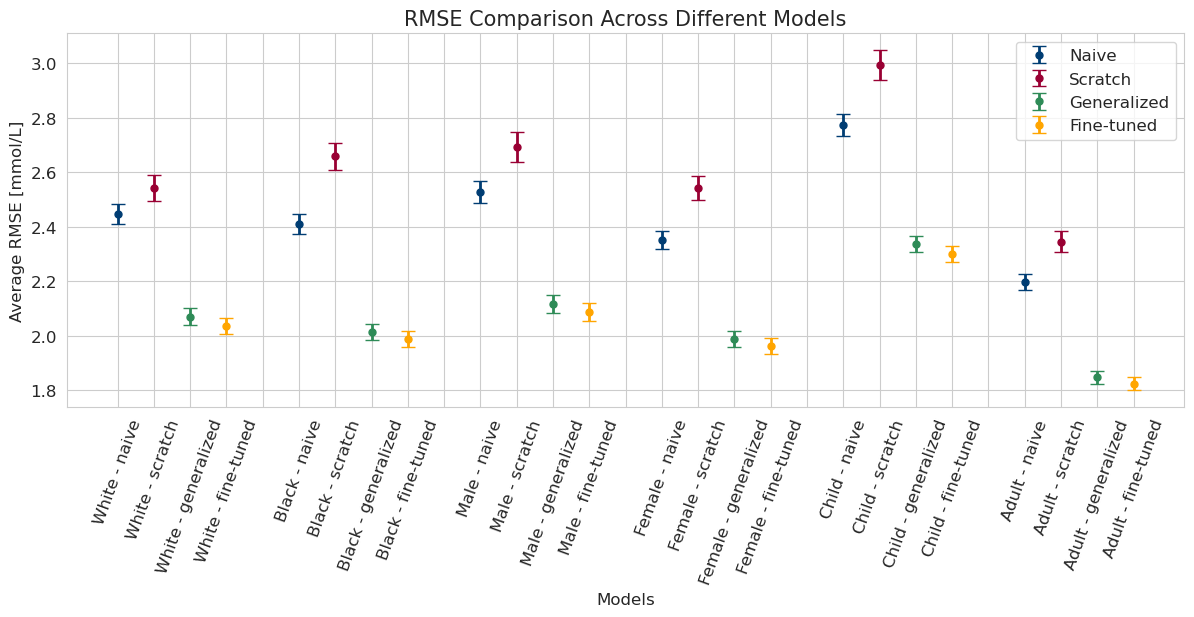

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
color1 = "#003d73"
color2 = "#990033"
color3 = '#2E8B57' # (Sea Green)
color4 = '#FFA500' # (Orange)
    
# Example data
categories = ['White - naive', 'White - scratch', 'White - generalized', 'White - fine-tuned',
              '     ',
              'Black - naive', 'Black - scratch', 'Black - generalized', 'Black - fine-tuned',
              '     ',
              'Male - naive',  'Male - scratch',  'Male - generalized',  'Male - fine-tuned',
              '     ',
              'Female - naive','Female - scratch','Female - generalized','Female - fine-tuned',
              '     ',
              'Child - naive', 'Child - scratch', 'Child - generalized', 'Child - fine-tuned',
              '     ',
              'Adult - naive', 'Adult - scratch', 'Adult - generalized', 'Adult - fine-tuned']


y_gr1_race_naive  = df_results_gr1_race['rmse_naive_mean']
y_gr1_race_single = df_results_gr1_race['rmse_single_mean']
y_gr1_race_base   = df_results_gr1_race['rmse_base_mean']
y_gr1_race_tl     = df_results_gr1_race['rmse_tl_mean']

y_gr2_race_naive  = df_results_gr2_race['rmse_naive_mean']
y_gr2_race_single = df_results_gr2_race['rmse_single_mean']
y_gr2_race_base   = df_results_gr2_race['rmse_base_mean']
y_gr2_race_tl     = df_results_gr2_race['rmse_tl_mean']

y_gr1_gender_naive  = df_results_gr1_gender['rmse_naive_mean']
y_gr1_gender_single = df_results_gr1_gender['rmse_single_mean']
y_gr1_gender_base   = df_results_gr1_gender['rmse_base_mean']
y_gr1_gender_tl     = df_results_gr1_gender['rmse_tl_mean']

y_gr2_gender_naive  = df_results_gr2_gender['rmse_naive_mean']
y_gr2_gender_single = df_results_gr2_gender['rmse_single_mean']
y_gr2_gender_base   = df_results_gr2_gender['rmse_base_mean']
y_gr2_gender_tl     = df_results_gr2_gender['rmse_tl_mean']

y_gr1_age_naive  = df_results_gr1_age['rmse_naive_mean']
y_gr1_age_single = df_results_gr1_age['rmse_single_mean']
y_gr1_age_base   = df_results_gr1_age['rmse_base_mean']
y_gr1_age_tl     = df_results_gr1_age['rmse_tl_mean']

y_gr2_age_naive  = df_results_gr2_age['rmse_naive_mean']
y_gr2_age_single = df_results_gr2_age['rmse_single_mean']
y_gr2_age_base   = df_results_gr2_age['rmse_base_mean']
y_gr2_age_tl     = df_results_gr2_age['rmse_tl_mean']

yerr_gr1_race_naive = [y_gr1_race_naive - df_results_gr1_race['rmse_naive_95p_CI_Lower'],  df_results_gr1_race['rmse_naive_95p_CI_Upper']  - y_gr1_race_naive]
yerr_gr1_race_single= [y_gr1_race_single- df_results_gr1_race['rmse_single_95p_CI_Lower'], df_results_gr1_race['rmse_single_95p_CI_Upper'] - y_gr1_race_single]
yerr_gr1_race_base  = [y_gr1_race_base  - df_results_gr1_race['rmse_base_95p_CI_Lower'],   df_results_gr1_race['rmse_base_95p_CI_Upper']   - y_gr1_race_base]
yerr_gr1_race_tl    = [y_gr1_race_tl    - df_results_gr1_race['rmse_tl_95p_CI_Lower'],     df_results_gr1_race['rmse_tl_95p_CI_Upper']     - y_gr1_race_tl]

yerr_gr2_race_naive = [y_gr2_race_naive - df_results_gr2_race['rmse_naive_95p_CI_Lower'],  df_results_gr2_race['rmse_naive_95p_CI_Upper']  - y_gr2_race_naive]
yerr_gr2_race_single= [y_gr2_race_single- df_results_gr2_race['rmse_single_95p_CI_Lower'], df_results_gr2_race['rmse_single_95p_CI_Upper'] - y_gr2_race_single]
yerr_gr2_race_base  = [y_gr2_race_base  - df_results_gr2_race['rmse_base_95p_CI_Lower'],   df_results_gr2_race['rmse_base_95p_CI_Upper']   - y_gr2_race_base]
yerr_gr2_race_tl    = [y_gr2_race_tl    - df_results_gr2_race['rmse_tl_95p_CI_Lower'],     df_results_gr2_race['rmse_tl_95p_CI_Upper']     - y_gr2_race_tl]

yerr_gr1_gender_naive = [y_gr1_gender_naive - df_results_gr1_gender['rmse_naive_95p_CI_Lower'],  df_results_gr1_gender['rmse_naive_95p_CI_Upper']  - y_gr1_gender_naive]
yerr_gr1_gender_single= [y_gr1_gender_single- df_results_gr1_gender['rmse_single_95p_CI_Lower'], df_results_gr1_gender['rmse_single_95p_CI_Upper'] - y_gr1_gender_single]
yerr_gr1_gender_base  = [y_gr1_gender_base  - df_results_gr1_gender['rmse_base_95p_CI_Lower'],   df_results_gr1_gender['rmse_base_95p_CI_Upper']   - y_gr1_gender_base]
yerr_gr1_gender_tl    = [y_gr1_gender_tl    - df_results_gr1_gender['rmse_tl_95p_CI_Lower'],     df_results_gr1_gender['rmse_tl_95p_CI_Upper']     - y_gr1_gender_tl]

yerr_gr2_gender_naive = [y_gr2_gender_naive - df_results_gr2_gender['rmse_naive_95p_CI_Lower'],  df_results_gr2_gender['rmse_naive_95p_CI_Upper']  - y_gr2_gender_naive]
yerr_gr2_gender_single= [y_gr2_gender_single- df_results_gr2_gender['rmse_single_95p_CI_Lower'], df_results_gr2_gender['rmse_single_95p_CI_Upper'] - y_gr2_gender_single]
yerr_gr2_gender_base  = [y_gr2_gender_base  - df_results_gr2_gender['rmse_base_95p_CI_Lower'],   df_results_gr2_gender['rmse_base_95p_CI_Upper']   - y_gr2_gender_base]
yerr_gr2_gender_tl    = [y_gr2_gender_tl    - df_results_gr2_gender['rmse_tl_95p_CI_Lower'],     df_results_gr2_gender['rmse_tl_95p_CI_Upper']     - y_gr2_gender_tl]

yerr_gr1_age_naive = [y_gr1_age_naive - df_results_gr1_age['rmse_naive_95p_CI_Lower'],  df_results_gr1_age['rmse_naive_95p_CI_Upper']  - y_gr1_age_naive]
yerr_gr1_age_single= [y_gr1_age_single- df_results_gr1_age['rmse_single_95p_CI_Lower'], df_results_gr1_age['rmse_single_95p_CI_Upper'] - y_gr1_age_single]
yerr_gr1_age_base  = [y_gr1_age_base  - df_results_gr1_age['rmse_base_95p_CI_Lower'],   df_results_gr1_age['rmse_base_95p_CI_Upper']   - y_gr1_age_base]
yerr_gr1_age_tl    = [y_gr1_age_tl    - df_results_gr1_age['rmse_tl_95p_CI_Lower'],     df_results_gr1_age['rmse_tl_95p_CI_Upper']     - y_gr1_age_tl]

yerr_gr2_age_naive = [y_gr2_age_naive - df_results_gr2_age['rmse_naive_95p_CI_Lower'],  df_results_gr2_age['rmse_naive_95p_CI_Upper']  - y_gr2_age_naive]
yerr_gr2_age_single= [y_gr2_age_single- df_results_gr2_age['rmse_single_95p_CI_Lower'], df_results_gr2_age['rmse_single_95p_CI_Upper'] - y_gr2_age_single]
yerr_gr2_age_base  = [y_gr2_age_base  - df_results_gr2_age['rmse_base_95p_CI_Lower'],   df_results_gr2_age['rmse_base_95p_CI_Upper']   - y_gr2_age_base]
yerr_gr2_age_tl    = [y_gr2_age_tl    - df_results_gr2_age['rmse_tl_95p_CI_Lower'],     df_results_gr2_age['rmse_tl_95p_CI_Upper']     - y_gr2_age_tl]

my_markersize2 = 5
plt.figure(figsize=(12, 6))  # Increase the figure size
x_positions = np.arange(len(categories))
plt.errorbar(x=x_positions[0], y=y_gr1_race_naive,   yerr=np.array(yerr_gr1_race_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2, label='Naive')
plt.errorbar(x=x_positions[1], y=y_gr1_race_single,  yerr=np.array(yerr_gr1_race_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2, label='Scratch')
plt.errorbar(x=x_positions[2], y=y_gr1_race_base,    yerr=np.array(yerr_gr1_race_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2, label='Generalized')
plt.errorbar(x=x_positions[3], y=y_gr1_race_tl,      yerr=np.array(yerr_gr1_race_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2, label='Fine-tuned')

plt.errorbar(x=x_positions[5], y=y_gr2_race_naive,   yerr=np.array(yerr_gr2_race_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[6], y=y_gr2_race_single,  yerr=np.array(yerr_gr2_race_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[7], y=y_gr2_race_base,    yerr=np.array(yerr_gr2_race_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[8], y=y_gr2_race_tl,      yerr=np.array(yerr_gr2_race_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[10],  y=y_gr1_gender_naive,  yerr=np.array(yerr_gr1_gender_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[11],  y=y_gr1_gender_single, yerr=np.array(yerr_gr1_gender_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[12], y=y_gr1_gender_base,   yerr=np.array(yerr_gr1_gender_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[13], y=y_gr1_gender_tl,     yerr=np.array(yerr_gr1_gender_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[15], y=y_gr2_gender_naive,  yerr=np.array(yerr_gr2_gender_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[16], y=y_gr2_gender_single, yerr=np.array(yerr_gr2_gender_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[17], y=y_gr2_gender_base,   yerr=np.array(yerr_gr2_gender_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[18], y=y_gr2_gender_tl,     yerr=np.array(yerr_gr2_gender_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[20], y=y_gr1_age_naive,  yerr=np.array(yerr_gr1_age_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[21], y=y_gr1_age_single, yerr=np.array(yerr_gr1_age_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[22], y=y_gr1_age_base,   yerr=np.array(yerr_gr1_age_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[23], y=y_gr1_age_tl,     yerr=np.array(yerr_gr1_age_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[25], y=y_gr2_age_naive,  yerr=np.array(yerr_gr2_age_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#,   label='Naive')
plt.errorbar(x=x_positions[26], y=y_gr2_age_single, yerr=np.array(yerr_gr2_age_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[27], y=y_gr2_age_base,   yerr=np.array(yerr_gr2_age_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#,     label='Generalized')
plt.errorbar(x=x_positions[28], y=y_gr2_age_tl,     yerr=np.array(yerr_gr2_age_tl).reshape(2, 1),fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#,    label='Fine-tuned')

my_fontsize2 = 10

plt.xticks(x_positions, categories, rotation=70)
plt.xlabel('Models', fontsize = my_fontsize2+2)
plt.ylabel('Average RMSE [mmol/L]', fontsize = my_fontsize2+2)
plt.title('RMSE Comparison Across Different Models', fontsize = my_fontsize2+5)
plt.legend(fontsize = my_fontsize2+2)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()

plt.savefig(f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6.png', dpi=600, format='png')  # Save as high-resolution PNG file
